# <h1 style='color:Blue'><center><u>*** Case Study On Airplane Crashes ***

# <h1><u><center>Import Libraries</center></u></h1>

In [260]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# <h1><u><center>Extract Dataset</center></u></h1>

In [261]:
df=pd.read_csv('crash.csv')

In [262]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


### Showing Columns present in this dataset

In [263]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

## Defining shape of Above Data

In [264]:
df.shape

(5268, 13)

* There are 13 columns and 5268 rows

## <u>Finding Basic Information of Datasets

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


* there is null data present in each column except date
* large number of null data is present in Flight column
* there is a total of 10 categorical and 3 numerical columns

### <h1 style="color:red"><u>Sum of Null Values in dataset</u></h1>

### Finding null values from dataset

In [266]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

* by using this formula we can assume the null data present in columns

### Finding percentage of null value from dataset

In [267]:
df.isnull().sum()/len(df)*100

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

* Searching for columns having a large amount of null data to drop it
* if a column contains atleast 50% of null data it will be dropped
* we need Time column for making insights of situations 

### Dropping columns which has more than 50% of null data

In [268]:
df.drop(['Flight #', 'Registration', 'cn/In','Time'], axis=1,inplace=True)

* dropping Flight table as it contains a large amount of null data
* it contains around 79% of null data

## Filling null data of remaining columns except time

In [269]:
df['Route'] = df['Route'].fillna('Not defined')
df['Summary'] = df['Summary'].fillna('No comments')
df['Operator'] = df['Operator'].fillna('Unknown')
df['Type'] = df['Type'].fillna('No Type')

In [270]:
df.head(20)

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,"Tienen, Belgium",Military - German Navy,Not defined,Zeppelin L-8 (airship),41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,"Off Cuxhaven, Germany",Military - German Navy,Not defined,Zeppelin L-10 (airship),19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,"Near Jambol, Bulgeria",Military - German Army,Not defined,Schutte-Lanz S-L-10 (airship),20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,"Billericay, England",Military - German Navy,Not defined,Zeppelin L-32 (airship),22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,"Potters Bar, England",Military - German Navy,Not defined,Zeppelin L-31 (airship),19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


* it shows 1st 20 rows of data present in this file

### finding out fatalities of people killed on ground

In [271]:
df['Ground'].value_counts()

0.0       5027
1.0         53
2.0         27
3.0         21
4.0         15
5.0         10
8.0         10
7.0          8
11.0         6
6.0          6
22.0         5
13.0         4
24.0         3
10.0         3
44.0         3
20.0         3
14.0         2
2750.0       2
30.0         2
12.0         2
19.0         2
47.0         2
52.0         2
70.0         2
54.0         1
18.0         1
45.0         1
16.0         1
35.0         1
50.0         1
23.0         1
225.0        1
125.0        1
75.0         1
15.0         1
32.0         1
49.0         1
9.0          1
40.0         1
36.0         1
113.0        1
107.0        1
33.0         1
87.0         1
31.0         1
63.0         1
17.0         1
37.0         1
58.0         1
85.0         1
Name: Ground, dtype: int64

* finding out the fatalities by the planes with respect to ground
* as we can see there are some large amount of fatalities
* in 2 airplane crashes, nearly 2750 people died.

In [272]:
df['Survived'] = df['Aboard'] - (df['Fatalities'] + df['Ground'])
df.Survived = np.where(df.Survived < 0, 0, df.Survived)
df.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


### finding unique records present in columns 

In [273]:
df.nunique()

Date          4753
Location      4303
Operator      2477
Route         3245
Type          2447
Aboard         239
Fatalities     191
Ground          50
Summary       4674
Survived       165
dtype: int64

### transfroming statistical information of certain columns for better understanding  

In [274]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Aboard,5246.0,27.554518,43.076711,0.0,5.0,13.0,30.0,644.0
Fatalities,5256.0,20.068303,33.199952,0.0,3.0,9.0,23.0,583.0
Ground,5246.0,1.608845,53.987827,0.0,0.0,0.0,0.0,2750.0
Survived,5236.0,7.421314,28.108456,0.0,0.0,0.0,2.0,516.0


* maximum 516 people survived in airplane accidents
* minimum 0 people are died in plane crashes
* maximum 583 people died in plane crashes
* 75% of airplane crashes resembles death count more than 20
* maximum 644 people boraded a plane
* maxmimum 2750 people died on ground due to airplane crashes
* average 20 people are died in airplane crashes
* average of 27 people abroaded a flight
* nearly 50% of airplane crashed resembles death of 9 people more or less

## <u>Accident of most people abroaded a flight

In [275]:
df.loc[df['Aboard'] == 644]

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
2963,03/27/1977,"Tenerife, Canary Islands",Pan American World Airways / KLM,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...,61.0


In [276]:
df.loc[2963].Summary

'Both aircraft were diverted to Tenerife because of a bombing at Las Palmas Airport. After an extended delay,  both planes were instructed to back track up the runway. The KLM plane reached its takeoff point while the Pan Am plane was still on the runway. The Pan Am plane continued up the runway missing the taxiway turnout. There was heavy fog on the runway. The KLM plane began its takeoff roll without permission with the Pan Am plane still on the runway. The KLM plane hit the Pan Am plane just as it was taking off. Both planes burst into flames.  KLM 234 + 14 crew,  Pan Am 326 + 9 crew killed. All aboard the KLM plane were killed. The Pan Am aircraft was named Clipper Victor. The KLM aircraft was named Rhine River.'

##### This incident of most people killed occured on 27 March 1977

## <u>Incident of most people survived</u>

In [277]:
df.loc[df['Survived'] == 516]

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
4645,07/23/1999,"Tokyo, Japan",All Nippon Airways,"Tokyo, Japan - Chitose, Japan",Boeing B-747,517.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,516.0


In [278]:
df.loc[4645].Summary

'Two minutes after taking off from Haneda Airport, a man carrying a knife forced a flight attendant to take him in the cockpit of the plane.  A fan of computer flight-simulation games, he stated he just wanted to fly a real plane.  After forcing the co-pilot out of the cockpit he ordered the captain to fly to a U.S. Air Force base in western Tokyo. When he refused, he stabbed the captain and seized the controls. After a sudden drop in altitude, the co-pilot and an off duty crew member entered the cockpit and overpowered the hijacker.  A one point the plane plunged to within 984 feet of the ground. The plane ultimately  landed safely but the captain died of his injuries.'

##### This incident of most people survived occured on 23 July 1999

##  <u>Incident of most people died on ground</u>

In [279]:
df.loc[df['Ground']==2750]

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
4803,09/11/2001,"New York City, New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...,0.0
4804,09/11/2001,"New York City, New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...,0.0


In [280]:
df.loc[4803].Summary

'The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the north tower of the World Trade Center between the 94th and 99th floors at approximately 450 mph.  After 102 minutes, the building collapsed. It was one of four planes that were hijacked the same day.'

In [281]:
df.loc[4804].Summary

'The aircraft was hijacked shortly after it left Logan International Airport in Boston. The hijackers took control of the aircraft and deliberately crashed it into the south tower of the World Trade Center between the 78th and 84th floors at approximately 550 mph. After 56 minutes, the building collapsed. It was one of four planes that were hijacked the same day.'

##### This two incidents of most people killed on the ground relates to same place which occured on 11 September 2001

In [282]:
df.head(5)

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


## <u>Average of people abroading in each flight

In [283]:
df['Aboard'].value_counts().mean()

21.94979079497908

* On an average 22 count of people abroad each flight

## <u>Showing Most Accidental Locations

In [284]:
df['Location'].value_counts()

Sao Paulo, Brazil                    15
Moscow, Russia                       15
Rio de Janeiro, Brazil               14
Anchorage, Alaska                    13
Manila, Philippines                  13
                                     ..
Near Charana, Bolivia                 1
Monte Matto, Italy                    1
Misaki Mountain, Japan                1
Angelholm, Sweden                     1
State of Arunachal Pradesh, India     1
Name: Location, Length: 4303, dtype: int64

* Most incidents are occured in Brazil,Russia,Alask and Philippines.

In [285]:
df.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


## <u>Finding data of most accidental area in World i.e Brazil(Sao Paulo)</u>

In [286]:
df[(df['Location']=='Sao Paulo, Brazil')][['Location','Summary']]

,Location,Summary
469,"Sao Paulo, Brazil",The mail plane crashed while taking off.
664,"Sao Paulo, Brazil",Crashed in fog.
836,"Sao Paulo, Brazil",Crashed into the Solimoes extension of the Ama...
1148,"Sao Paulo, Brazil",Crashed into a house shortly after taking off ...
1203,"Sao Paulo, Brazil",Crashed while attempting to make an emergency ...
1269,"Sao Paulo, Brazil",Crashed while on final approach to Sao Paulo. ...
1327,"Sao Paulo, Brazil",The cargo plane crashed on takeoff. Elevator l...
1406,"Sao Paulo, Brazil",Crashed on takeoff.
1619,"Sao Paulo, Brazil",Crashed a few minutes after taking off from Sa...
1828,"Sao Paulo, Brazil",The crippled airliner crashed into houses and ...


In [287]:
df[(df['Fatalities']>20) & (df['Location']=='Sao Paulo, Brazil')]

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
1406,12/19/1955,"Sao Paulo, Brazil",Cruzeiro Do Sud,Sao Paulo - Belem,Douglas DC-3,26.0,26.0,0.0,Crashed on takeoff.,0.0
1848,05/03/1963,"Sao Paulo, Brazil",Cruzeiro,Sao Paulo - Rio de Janeiro,Convair CV-340-59,50.0,37.0,0.0,The aircraft returned to airport after the No....,13.0
5159,07/17/2007,"Sao Paulo, Brazil",TAM (Brazil),Porto Alegre - Sao Paulo,Airbus A-320-233,187.0,187.0,12.0,The jet airliner crashed while attempting to l...,0.0


* There are 3 main incidents to observe which caused more than 20 deaths in a single flight crash
* only one of 3 incidents people survived on a minimum count of 13
* The flight from Porto Alegre resulted atmost deaths in a single crash in which not a single person survived but caused a death of 187 people


In [288]:
df.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


## <u>Showing correlation between abroad and fatalities

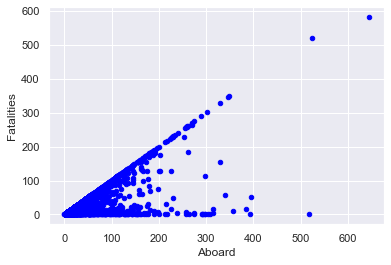

In [289]:
df.plot(x="Aboard", y="Fatalities", kind="scatter",color='blue')
plt.show()

##### 1.There is a positive correlation between abroad and fatalities
##### 2.As there is increase in abroading passengers there is increase in fatalities

In [290]:
df.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0


## <u>Finding out count of accidents on different routes

In [291]:
df['Route'].value_counts()

Not defined                   1706
Training                        81
Sightseeing                     29
Test flight                     17
Test                             6
                              ... 
Manila - Lapu Lapu               1
Saint Denis - Paris              1
Cork - London                    1
Peoria, IL - St. Louis, MO       1
Mechuka for Jorhat               1
Name: Route, Length: 3245, dtype: int64

* Most accidents are occured while training, sighseeing and test flight

## <u>Creating New columns named Day,Month,Year,Decade,Date of Year 

In [292]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Decade'] = (df['Year']) // 10 * 10
df['Day of Week'] = pd.DatetimeIndex(df['Date']).day_name()

In [293]:
df.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived,Month,Year,Decade,Day of Week
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,9,1908,1900,Thursday
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,7,1912,1910,Friday
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,8,1913,1910,Wednesday
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,9,1913,1910,Tuesday
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,10,1913,1910,Friday


## <u>Plot the graph of showing counts of accidents on weekdays

<AxesSubplot:title={'center':'Count of crashes by Day of Week'}>

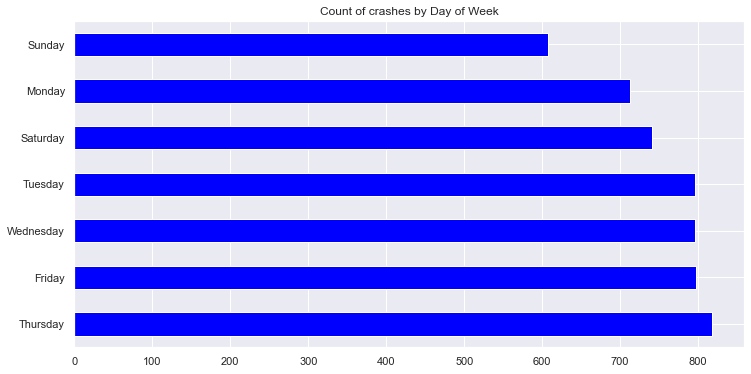

In [294]:
df['Day of Week'].value_counts().plot(kind='barh', figsize=[12, 6], title='Count of crashes by Day of Week',color='blue')

* From this bar graph we can assume that sunday has the least amount of accidents
* While Thursday has most accidents through the week
* Tuesday, Wednesday and Friday have same amount of accidents

## <u>Plotting Bar graph to see Accidents with respect to Seasons

Season
Rainy     1747
Summer    1599
Winter    1922
Name: Season, dtype: int64

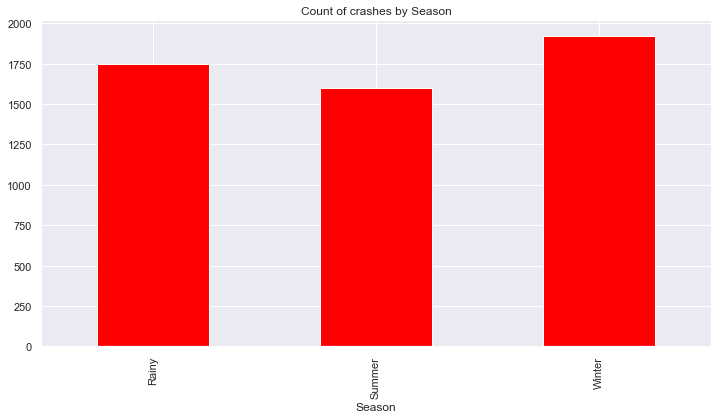

In [295]:
def get_season(month):
    if month >= 2 and month <= 5:
        return 'Summer'
    elif month >= 6 and month <= 9:
        return 'Rainy'
    else:
        return 'Winter'

df['Season'] = df['Month'].apply(get_season)

crashed_by_season = df['Season'].groupby(df['Season']).count()
crashed_by_season.plot(kind='bar', figsize=[12, 6], title='Count of crashes by Season',color='red')
crashed_by_season

* As compared there are more incidents in Winter season as compared to Rainy season and Summer season
* Summer season has the lowest amount of accidents through the other 2 seasons

## <u>Plotting to see Fatalities with respect to years 

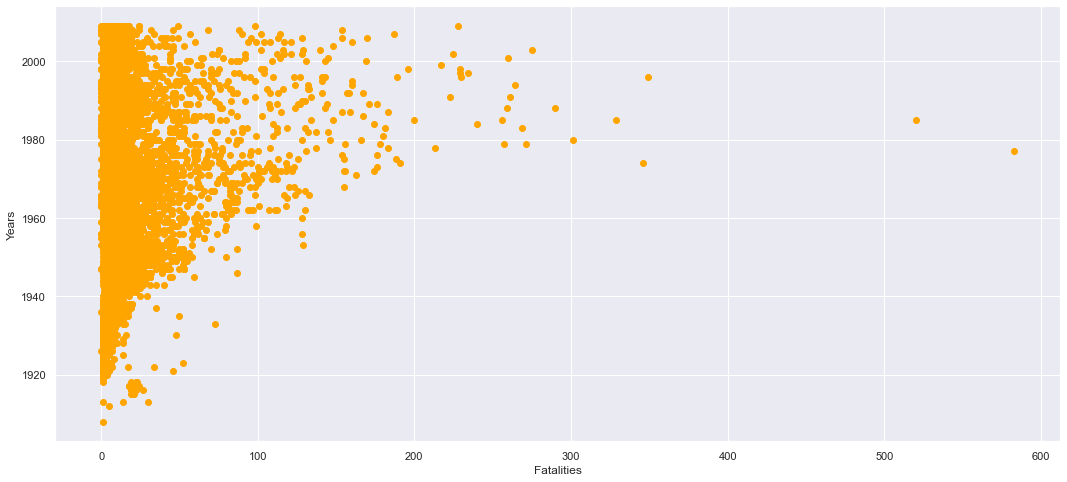

In [296]:
plt.figure(figsize= (18, 8))
years = df['Year']
plt.plot(df['Fatalities'], years, 'o',color='orange')
plt.xlabel('Fatalities')
plt.ylabel('Years')
plt.show()

* most airplane accidents occured after 1940
* There is a serious amount of fatalities in years 1960 to 2000

## <u>Plotting bar graph for incidents in which plane is highjacked with respect to year

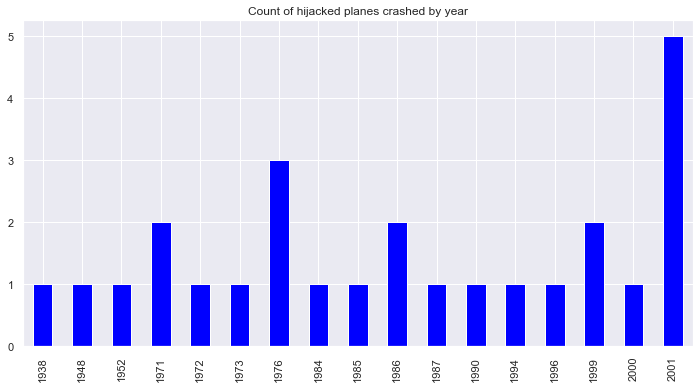

In [297]:
df[df['Summary'].str.contains('hijacke')]['Year'].value_counts().sort_index().plot(kind='bar',figsize=[12, 6], title='Count of hijacked planes crashed by year',color='blue')
plt.show()

* Most airplanes are hijacked in the year 2001 followed by year 1976


## <u>Plotting pie diagram to see difference between fatalities and survivors

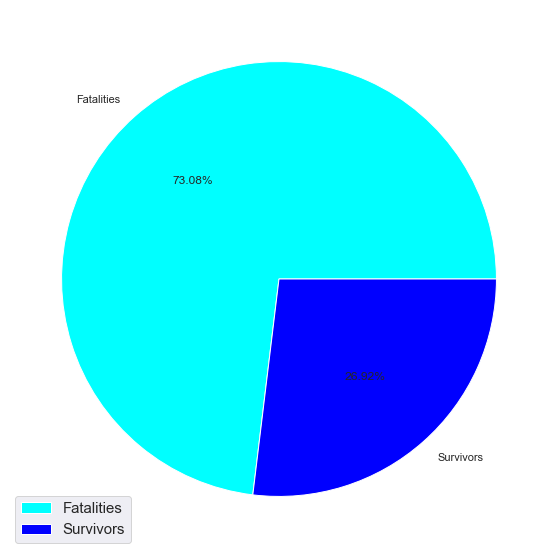

In [298]:
sns.set_palette('pastel')
plt.figure(figsize=(15,10))
Survived=df.Survived.sum()
Fatalities = df.Fatalities.sum()

y = np.array([Fatalities, Survived])
mylabels = ["Fatalities", "Survivors"]

plt.pie(y, labels = mylabels,autopct='%1.2f%%',colors=['cyan','blue'])
plt.legend(fontsize=15)
plt.show()

* There is a serious amount of fatalities as compared to survivors
* Around 73% of fatalities are recorded in accidents as compared to 27% of survivors
* It shows a guarantee of more fatalities in a single accident than survivors

## <u>Showing realtion between Fatalities, Survivors and People killed on Ground

In [299]:
FSG_per_year = df[['Year', 'Fatalities', 'Survived', 'Ground']].groupby('Year').sum()

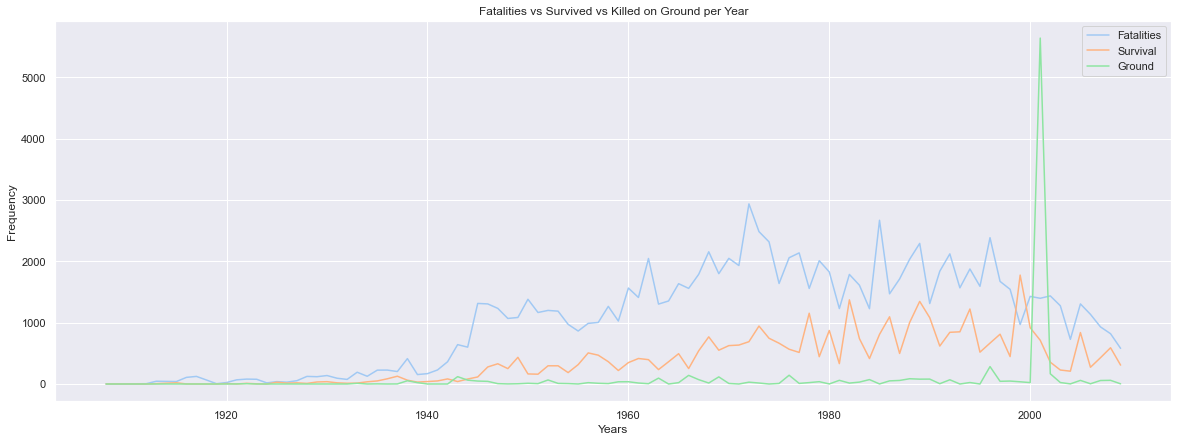

In [300]:
plt.figure(figsize=(20,7))
sns.lineplot(x = 'Year', y = 'Fatalities', data = FSG_per_year,palette='bright')
sns.lineplot(x = 'Year', y = 'Survived', data = FSG_per_year)
sns.lineplot(x = 'Year', y = 'Ground', data = FSG_per_year)
plt.legend(['Fatalities', 'Survival', 'Ground'])
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Fatalities vs Survived vs Killed on Ground per Year')
plt.show()

* By assuming this data we clearly state that more fatalities are occured 
* Survival count is very low with respect to fatalities
* In a certain there are few incidents on ground which caused highest amount of deaths
* Very few incidents have more survivals than fatalities

In [301]:
df.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived,Month,Year,Decade,Day of Week,Season
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,9,1908,1900,Thursday,Rainy
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,7,1912,1910,Friday,Rainy
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,8,1913,1910,Wednesday,Rainy
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,9,1913,1910,Tuesday,Rainy
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,10,1913,1910,Friday,Winter


## <u>Plotting a bar graph to show Crashes per year 

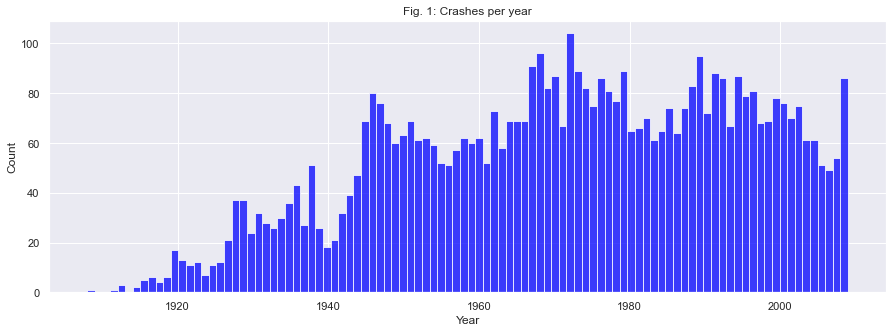

In [302]:
plt.figure(figsize=(15, 5))
per_year_plot = sns.histplot(data = df, x = 'Year', bins = 100, color = "blue")
per_year_plot.set(title = "Fig. 1: Crashes per year")
fig = per_year_plot.get_figure()
fig.savefig('per_year_plot.png')

* There are very much incidents occured in certain years
* After 1940 there is a medium amount of increase in Airplane crashes
* While on the other side, there is a tremendous growth in accidents from year 1960 which is near to constant uptil 2000

## <u>Showing fatalities with respect to model of airplanes

In [303]:
df_fatal = df.groupby('Type')[['Fatalities']].sum()
df_fatal

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
...,...
de Havilland Dove 1,22.0
de Havilland Dragon 1,3.0
de Havilland RU-6A Beaver /Bell UH-1H,18.0


* This shows the accidents in all certain models of airplanes which are present in data
* By analyzing it shows that AAC-1, Atr-42-300 and Bell UH-1H plane types have occured in such accidents the most

## <u>Showing Top 10 Type of airplanes as per accidents

In [304]:
df_fatal = df_fatal.rename(columns={'Type': 'Fatalities'})
df_type_fatal = df_fatal.sort_values(by='Fatalities')
df_type_fatal_top10 = df_fatal.head(10) 
df_type_fatal_top10

,Fatalities
Type,
AAC-1 Toucan,23.0
AEGK,5.0
AT L98 Carvair,4.0
ATR 42-300,2.0
ATR-42-300,46.0
ATR-72-202,16.0
ATR-72-212,68.0
Aermacchi MB-339PAN (3 aircraft),3.0
Aero Commander 520,6.0


* The ATR models have faced more situations than other models 
* As we can see ATR-42-300 and ATR-72-212 have most accidents followed type AAC-1 Toucan
* As the other side Aero commander types has the least accidents than other airplane types

## <u>Plotting bar graph to see in detail about Types of models of airplanes and fatalities caused by them

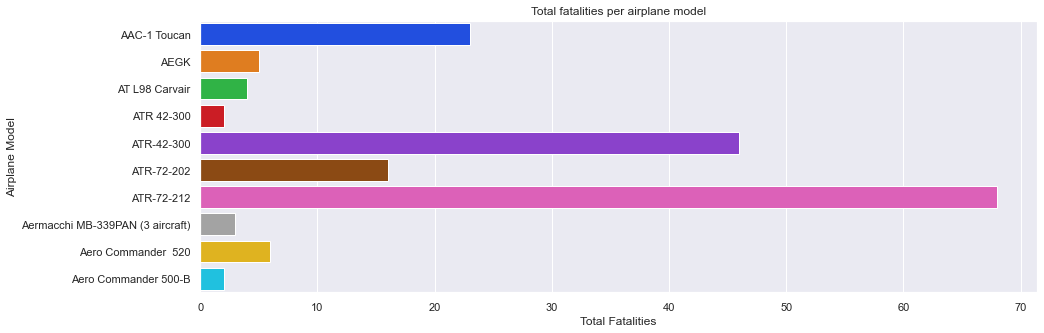

In [305]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_type_fatal_top10.index, x="Fatalities", data=df_type_fatal_top10, palette="bright")
plt.xlabel('Total Fatalities')
plt.ylabel('Airplane Model')
plt.title('Total fatalities per airplane model')
plt.show()

* By seeing the above graph we can state that ATR-72-212 has the highest amount of fatalities which is 68
* While compared Aero Commander 500-B and ATR-42-300 has the least amount of deaths i.e. 2

## <u>Creating a column Total death for further plottings

In [306]:
df["Total Death"] = df["Fatalities"] + df["Ground"]
df.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,Survived,Month,Year,Decade,Day of Week,Season,Total Death
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1.0,9,1908,1900,Thursday,Rainy,1.0
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,7,1912,1910,Friday,Rainy,5.0
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Not defined,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,8,1913,1910,Wednesday,Rainy,1.0
3,09/09/1913,Over the North Sea,Military - German Navy,Not defined,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,6.0,9,1913,1910,Tuesday,Rainy,14.0
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Not defined,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,10,1913,1910,Friday,Winter,30.0


* Total death is a total of fatals in airplane accident and people which died because of plane crash on ground

## <u>Showing Top 10 airline operators which result in most total death

In [307]:
df_death_airline = df.groupby('Operator')[['Total Death']].sum() 
df_death_airline = df_death_airline.sort_values(by='Total Death', ascending=False)
df_death_airline_top10 = df_death_airline.head(10)

df_death_airline_top10

,Total Death
Operator,
Aeroflot,7184.0
American Airlines,4310.0
Military - U.S. Air Force,3866.0
United Air Lines,3770.0
Air France,1739.0
Pan American World Airways,1322.0
Military - U.S. Army Air Forces,1150.0
AVIANCA,944.0
Turkish Airlines (THY),891.0


* As we can see Aeroloft has caused most amount of deaths which 7184 followed by American Airline 
* Also note the point that Indian Airlines has the least amount of deaths throughout all 10
* Also there is high amount of difference in total death between Aeroloft and American Airlines

## <u>Plotting Bar Graph for showing above data in detail 

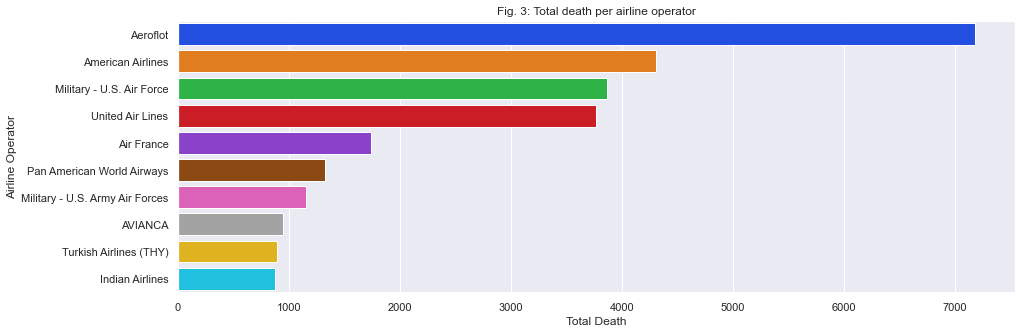

In [308]:
plt.figure(figsize=(15, 5))
sns.barplot(y=df_death_airline_top10.index, x="Total Death", data=df_death_airline_top10, palette="bright")
plt.xlabel('Total Death')
plt.ylabel('Airline Operator')
plt.title('Fig. 3: Total death per airline operator')
plt.show()

* As we can see there is growth in total death in American company operators airplanes